# What are iteration? (process)

Iteration is a general term for taking each item of something, one after another. Any time you use a loop, explicit or implicit, to go over a group of items, that is iteration. 

In [ ]:
# Example:  loops -> iters on a sequence 

num= [1,2,3]

for i in num: 
    print(i)

1
2
3


# What is iterator? (concept)
An iterator is an object that allows the programmer to traverse through a sequence of data without having to store the entire data in the memory. 

so basically iterator bring i into memory, uses it and deletes it, thus we are only occupying space of one object at a time. 
* 1 -> memory -> deletes 
* 2 -> memory -> deletes 
* 3 -> memory -> deletes 

In [ ]:
# 1- 1000000 and mul by 2 
import sys 

L = [x for x in range(1, 100000)]

# for i in L: 
#     print(i*2)


# How much memory did we use? 
sys.getsizeof(L)/1024 # Almost 8 mb

# How much memory did x use? 
x = range(1,10000000)
sys.getsizeof(x)/1024 # 0.04 mb

# Q: Why such a huge difference? 
# As L is list occupying whole space in your memory, where as x is an iterator, will use one at a time.
# Memory of L increase as max of range increase, but memory of x will remain same. 


0.046875

In [ ]:
range(10) # gives answer in iterator form. To save memory, rather than list or tuple etc. 
# even zip func is a iterator. 
# map(func, iterable) -> return iterable, we have to use list on top of it 

range(0, 10)

In [12]:
print(list(zip([1,2,3], [5,6,7])))

[(1, 5), (2, 6), (3, 7)]


# What is iterable? 

Iterable is an object, which one can iterate over. 
It generates an iterator when passed to iter() method. 

Data type that are iterable:
* string
* tuple 
* set 
* dict 
* list

### Point to remember
- To convert any iterable object to iterator (pass it through iter())
- Every Iterator is also and Iterable
- Not all Iterables are Iterator

## Trick
- Every Iterable has an iter function
- Every Iterator has both iter function as well as a next function

In [ ]:
L= [1,2,3] # List 
print(iter(L)) # now its iterator. 

In [ ]:
# How to check if something iterator or iterable

k= [1,2,3]
print(dir(k)) # if only iter available then its only iterable. 
print(dir(iter(k))) # both iter and next is available then its iterator. 
a= (zip([1,2,3], [5,6,7]))
print(dir(a)) # __next___ is also available then its iterator. 

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']
['__class__', '__dela

### Understanding for loop: 

In [4]:
nums= [1,2,3,4]
for i in nums:
    print(i)

1
2
3
4


In [7]:
# what happens in background: 
nums=[1,2,3,4]
# step 1: converts iterable to iterator
iter_num= iter(nums)
# step2: use next() func for iteration
print(next(iter_num)) # 1
print(next(iter_num)) # 2
print(next(iter_num)) # 3
print(next(iter_num)) # 4
# step 3: as soon as next(iter_nums) throw StopIteration error for loop will stop
print(next(iter_num)) # it will throw StopIteration error

1
2
3
4


StopIteration: 

KeyboardInterrupt: 

In [ ]:
# making our own for loop:
def mera_for_loop(iterable): 
    iterator= iter(iterable) # step1 
    while True:
        try:  # step 2
            print(next(iterator)) 
        except StopIteration: # step 3
            break

nums=[1,2,3,4]
mera_for_loop(nums)

1
2
3
4


 Question: When to iterator object in real time? 
 Ans: When we want a create a function on which we can run a loop.

In [ ]:
# Creating our own range function? 

class mera_range():
    
    def __init__(self, start, stop): # constructor eg: abc= mera_range(10, 20), you can think self will be abc
        self.start= start 
        self. stop= stop

    def __iter__(self):
        return mera_range_iterator(self)

class mera_range_iterator:
    
    def __init__(self,iterable_object): # Here self will be object of mera_range_iterator and 
                                        # iterable object will be object of mera_range (i.e mera_range self)
        self.iterable= iterable_object

    def __iter__(self):
        return self

    def __next__(self):
        if self.iterable.start >= self.iterable.stop:
            raise StopIteration
        current= self.iterable.start 
        self.iterable.start+=1
        return current
    
    """
    Question: Why we do we need mera_range_itetor?? Ideally we are able to do it in one function only.
    So what happens is if run a= [1,2,3] and b=list(a) it will create two different id's or will point to two different places in the memory,
    but here by doing mera_range_iterator's iter function, when we do a=iter(nums) b= iter(a) they both returns same id thus giving same location in memory. 
    Thus, it case someone tries to convert already iterator to iterator again we are not occupying the space. This is one of functionality of iter(). 
    Similar concept is being used for generator as well. 
    """

In [ ]:
nums=[1,2,3]
print(id(nums)) 
a= list(nums) # here we applying list to existing list, and we see that id's are different. 
print(id(a))

4474775872
4474870016


In [ ]:
nums=[1,2,3]
a= iter(nums)
print(id(a))
b= iter(a) # id of a and b is same, that is because when we apply iter on iterator, id doesnt change, it returns itself.
    # Thus, this helps with memory saving, as rather creating a different object, iter function is returning itself. 
print(id(b))

4474560640
4474560640


In [14]:
for i in mera_range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


# Generator

- Python generators are simple way to create iterators. 
- Create a function, instead of return use yeild.

Question: What is difference between iterator and generator?? 

Ans: Iterator is an object that only uses memory when called and deletes after execution, Generators are used to create iterator object. 

In [1]:
def gen_demo():
    yield 'first'
    yield 'second'
    yield 'third'

In [ ]:
gen= gen_demo() # here gen is iterator

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

first
second
third


StopIteration: 

In [ ]:
# you could run for loop on gen as well

gen= gen_demo()

for i in gen:
    print(i) 

first
second
third


In [9]:
# write a generator to create square of number in range provided by user 
def square(num):
    for i in range(num):
        yield i**2

In [10]:
for i in square(10):
    print(i)

0
1
4
9
16
25
36
49
64
81


In [20]:
# Range with generator
def mera_range_gen(start,stop): 
    while start< stop:
        current= start
        start+=1 
        yield current

In [21]:
for i in mera_range_gen(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


# Generator Expression

In [22]:
# List Comprehension

l= [i for i in range(1,10)]
l

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
# Generator expression

g= (i for i in range(1,10))
g

<generator object <genexpr> at 0x107327a00>

### Tip: Whenever we want to extract values for generator | iterator object we can use:
- for loop
- next function
- wrap it with iterable object (eg: list, tuple etc)

In [31]:
# !pip install opencv-python
# !pip install matplotlib

In [32]:
# using emotion detection files from kaggle it has over 1000 images 
import os 
import cv2 

def image_data_read(folder_path):

    for file in os.listdir(folder_path):
        f_array= cv2.imread(os.path.join(folder_path, file))
        yield f_array



In [33]:
gen= image_data_read('/Users/vrunda/Desktop/Data_Science_Code_N_Debug/Dataset/Emotion Dataset/test/angry')

In [39]:
image= next(gen)

In [37]:
image.shape

(48, 48, 3)

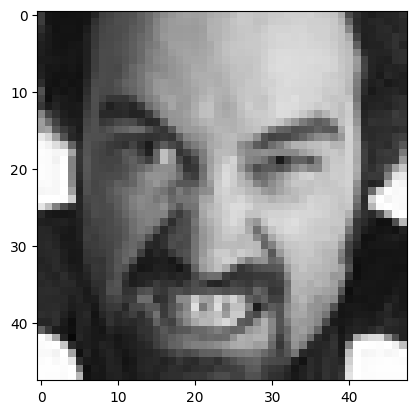

In [40]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [ ]:
# Thus we can run our model through all the image will using memory of one image at a time.

#  for i in gen: 
#    model.fit(i)

### Benifits of Generators

1. Ease of implementation
2. Memory efficient
3. Representing infite series (while True) (keep using next as many times as you want, without memory overflow.)
4. Chaining generators. 

In [43]:
# Chaining generators: 

def fib(nums):
    x,y=0,1
    for i in range(nums):
        x,y= y,x+y
        yield x


def square(nums):
    for x in nums: 
        yield x**2 

In [44]:
print(sum(square(fib(10))))

4895
